# Homework 1: Linear Regression

## (60 points + 20 Extra Credit Points)

### Note: Best solution to each problem or exercise will get receive extra credit of 5 points

# Part 1: Learning Goal 

The goal of the first part of this homework is to get hands-on experience and intuition about linear regression and regularization. We once again emphasize the difference between fitting and predicting. We will see that it is much more difficult to get good out-of-sample performance on a test set (predicting) than it is to get good in-sample performance on the training set (fitting).

## Overview:

In homework 0: We explored linear regression in the context of a prediction problem. In this notebook, we'll formally introduce the notion of regression and see how learning and prediction can be improved by introducing regularization. We will focus mainly on simple applications of linear regression: minimizing the mean-square-error on the training data (i.e. in-sample error) and see how well we perform on the test data (i.e. out-of-sample error). 


As we discussed in Sec. II of the review, there is a fundamental difference between minimizing the in-sample error and minimizing the out-of-sample error. The underlying reason for this is that the training data may not be representative of the full data distribution. From a Bayesian point of view, as [David MacKay](http://www.inference.org.uk/mackay/) likes to repeat: <i>We can't make predictions without making assumptions.</i> Thus, it is sensible to introduce priors that reflect the fact that we are likely to be undersampled (especially in high dimensions).

We'll consider ordinary least squares regression problem in which the "error function" is defined as the square from the deviation of our linear predictor to the true response. We will supplement this error function with a regularizer that prevents overfitting. From a Bayesian point of view, the regularization can be thought of as a prior on parameters, see Sec VI.
Minimizing the combined in-sample error + regularization terms is the same as the <b> Maximum a posteriori probability (MAP)</b> estimate in Bayesian regression (the parameters at which the posterior probability distribution is peaked). Note that in a true Bayesian approach, we should not use the mode of the posterior but the average over all possible choices of parameters weighted by their posterior probability. In practice, this is  often not done (for computational and practical reasons).



## Least squares linear regression: 

Consider data of the form $(y_i,\mathbf{x}_i)$ where the index $i=1\ldots n$ runs over the number of examples in the training data and $\mathbf{x}_i$ is a $p$-dimensional feature (row) vector. For notational convenience, it is useful to define the $n \times p$ <b>design matrix</b> $X$ whose rows, $\textbf{x}_1,\cdots, \textbf{x}_n$, are the examples and columns, $X_1,\cdots, X_p$,  are the measured "features" (i.e. feature predictors). We also denote the $n$-dimensional column vector of sample $i$ as $\mathbf{y}_i$ and the $p$-dimensional column vector of regression parameters $\mathbf{w}\in\mathbb{R}^p$.

For ordinary least square regression (no regularization), we minimize the square loss cost function:

$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||X\textbf{w}-\textbf{y}||_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} \,(X\mathbf{w}-\mathbf{y})^T(X\mathbf{w}-\mathbf{y}),
$$

or equivalently, in component form,
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}}   \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}_i)^2.
$$

If rank$(X)=p$, namely, the feature predictors $X_1,\cdots X_p$ are linearly independent, then there exists unique solution to this problem:

$$
\hat{\textbf{w}}= (X^TX)^{-1}X^T \textbf{y}
$$


### Theoretical Problem 1: (20 points) ###  
<ul>

<li> Derive $\hat{\textbf{w}}$ explicitly by solving the least square problem defined above.

<li> Is $\hat{\textbf{w}}$ still well-defined when rank$(X)<p$? This happens when, for example, $n<p$. 

<li> Now imagine the samples are generated by the following god-give rule: $y_i=\textbf{w}_\text{true}\cdot \textbf{x}_i+\epsilon_i$ where $\epsilon_i\sim\mathcal{N}(0,\sigma^2)$ are i.i.d. Gaussian errors. 
 Assuming that $X$ and $\epsilon_i$ are independent, and assume that $X^TX$ is invertible.
   
You'll follow the steps below to prove the **expected in-sample error** is given by
    
$$\bar E_{in} \equiv \mathbb{E}_D[E_{in}(\hat w)] = \sigma^2 \left( 1 - p/n \right)$$,
    
where $\mathbb{E}_D[\cdots]$ is taken over all i.i.d pairs $(y_i,\textbf{x}_i)$ and $\hat{\textbf{w}}$ is the least squares solution given above.
    
(a) Show that the in-sample estimate of $\textbf{y}$ is given by 
    
$$\hat{\textbf{y}} = X\hat{\textbf{w}} + H{\epsilon_S}$$,
    
where ${\epsilon_S} = [\epsilon_1, \epsilon_2, \dots, \epsilon_n]^T.$ Write down the matrix $H$ in terms of known matrices.

    
(b) Show that the in sample error vector $\hat{\textbf{y}} - \textbf{y}$ can be expressed as a matrix times ${\bf \epsilon}_S$. What is this matrix?


(c) Express $E_{in}(\hat{\textbf{w}})$ in terms of ${\epsilon_S}$ using (b), and simplify the expression using the fact that if $I$ is the identity matrix of size $n$, then $(I-H)^k = I-H$ for any positive integer $k$.
    
(d) Prove that $\bar E_{in} = \sigma^2(1-p/n)$ using (c) and the independence of $\epsilon_i$'s. (Hint: You may need to use the identity $\text{trace}(AB) = \text{trace}(BA)$)
    
<li> Now we'll guide you how to show that the expected out-of-sample error in the asymptotic limit of large $n$ is given by
    
$$\bar E_{out} \equiv \mathbb{E}_D[E_{out}(\hat w)] = \sigma^2 \left( 1 + p/n + O(1/n)\right).$$ 
    
We'll assume that the 2nd moment matrix $\Sigma = \mathbb{E}_{\textbf{x}}[\textbf{x}\textbf{x}^T]$
    
(e) For a test point $\textbf{x}$, show that the error is $$\epsilon - \textbf{x}^T(X^T X)^{-1}X^T{\epsilon_S}$$,
    
where $\epsilon$ is the noise realization for the test point and $\epsilon_S$ is the vector of noise realizations on the data defined above.
    
(f) Take the expectation with respect to the test point $\textbf{x}$ and $\epsilon$, i.e. $\mathbb{E}_{D,\epsilon}[\dots]$ to obtain an expression for $ E_{out}.$
Show that 
    
$$ E_{out} = \sigma^2 + \text{trace}\left( \Sigma (X^T X)^{-1} X^T \epsilon_S \epsilon_S^T X^T(X^TX)^{-1}\right). $$
    
[Hint: you may use trace identities such as expectation and trace commute, and more that might be useful in the wikipedia article [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra))]
    
(g) Calculate $\mathbb{E}_{\epsilon_S}[\epsilon_S \epsilon_S^T]$
    
(h) Take the expectation with respect to $\epsilon_S$ to show that, on average, 
    
$$ \bar E_{out} = \sigma^2 + \frac{\sigma^2}{n}\text{trace}\left(\Sigma \left(\frac{1}{n}X^TX\right)^{-1}\right).$$
    
Note that $\frac{1}{n} X^TX = \frac{1}{n}\sum_{i=1}^n \textbf{x}_i \textbf{x}_i^T$ is an $n$ sample estimate of $\Sigma$. So $\frac{1}{n} X^TX \approx \Sigma$. If $\frac{1}{n} X^TX = \Sigma$, then what is $\bar E_{out}$ on average? 
    
(i) (**Extra Credit: + 5 points**) Show that (after taking the expectation over the data noise) with high probability, 

$$ \bar E_{out} = \sigma^2 \left( 1 + p/n + O(1/n) \right).$$
    
[Hint: By the law of large number $\frac{1}{n} X^TX$ converges in probability to $\Sigma$, and so by continuity of the inverse at $\Sigma$, $\left(\frac{1}{n} X^TX\right)^{-1}$ converges in probability to $\Sigma^{-1}$.
</ul>




From Theoretical Problem 1, it is clear that the uniqueness of the solution is only guaranteed when rank$(X)>p$. But even so we still may not want to use least squares if $p$ is moderately close to $n$, because its "risk" could be quite poor. One way to deal with this is to  <i> regularize</i>.

We will be concerned with two classes of regularizers: <b> L2-regularization</b> which is often called <b> Ridge-Regression</b> (or <b>Tikhonov regression </b>) and <b> L1-regularization</b> which goes under the name <b>LASSO</b> (and is closely related to <b>Compressed Sensing</b>).


## Ridge Regression
In Ridge-Regression, the regularization penalty is taken to be the L2-norm of the parameters
$$
E_{ridge}= \lambda ||\textbf{w}||_2^2 = \lambda \textbf{w}^T \textbf{w}=\lambda \sum_{\gamma=1}^p w_\gamma w_\gamma.
$$

Thus, the model is fit by minimizing the sum of the in-sample error and the regularization term
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||X\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$
Notice that the parameter $\lambda$ controls how much we weigh the fit and regularization term.

### Theoretical Exercise 1:  (5 points) ###  
<ul>
<li>Show that the solution to Ridge regression is given by $\mathbf{w}_{ridge}= (X^TX+\lambda I)^{-1}X^T \textbf{y}$. 
<li>Express your answer in terms of the Singular Value Decomposition of $X$.
</ul>

## LASSO ##

We will also be interested in the case where the penalty is the L1-norm of the parameters (sum of absolute values of parameters). This is called LASSO.
$$
E_{LASSO}= \lambda ||\mathbf{w}||_1 = \lambda \sum_{\gamma=1}^p |w_\gamma| .
$$
In this case, 
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2n} ||X\mathbf{w}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1.
$$
Note the prefactor $1/(2n)$ in the loss function is not essential to this formulation. We have chosen this form to be consistent with Scikit package in Python. As we discussed in the main text, LASSO tends to give sparse solution. In the following we're going to explore these ideas a little bit more.



### Theoretical Exercise 2: (5 points) ###  
<ul>
<li>In this case, can you derive an analytic expression for $\mathbf{w}_{LASSO}$? Do you have any ideas about how we might be able to efficiently numerically calculate this? 
<li> Do you think LASSO and Ridge Regression will give qualitatively different answers? (Consider the limits $\lambda=0$ and $\lambda = \infty$.)
</ul>

## Numerical Experiments with Ridge Regression and LASSO ##

We will now perform some numerical experiments with the Diabetes Dataset trying to predict diabetes outcomes one year forward. More information about this data set can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes">https://archive.ics.uci.edu/ml/datasets/Diabetes</a>. This dataset was described in the famous <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf">Least Angle Regression</a> paper by Efron, Hastie, Johnstone, Tibshirani as follows:
<blockquote>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the
response of interest, a quantitative measure of disease progression one year after baseline.</blockquote>


We start by plotting the weights for each value of $\lambda$ for Ridge Regression and LASSO. This is called a regularization path. We also compare the in-sample and out-of-sample performance between two regressions by examining the $R^2$ coefficient of determination (for detailed definition see <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">here</a>): $R^2$. In terms of linear regression, $R^2$ tells us how well the regression function fits the data. The best attainable fit corresponds to $R^2=1$.



Automatically created module for IPython interactive environment


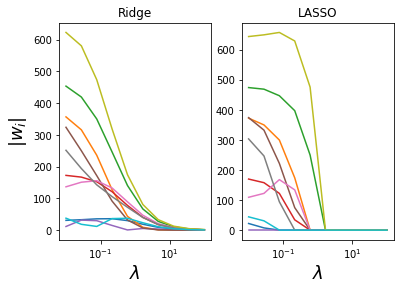

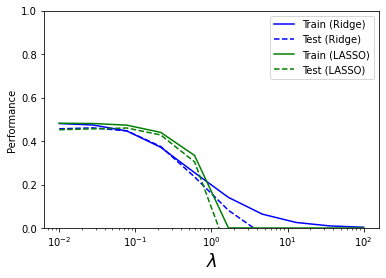

In [3]:
%matplotlib inline

#This code is modified from plot_cv_diabetes.py in the skit-learn documentation
#and plot_ridge_path.py



from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn import datasets, linear_model

#Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

#Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


#Chooose paths
alphas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 100
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



#Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([0, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()






### Numerical Exercise 1: (10 points) ###  
<ul>
<li>What do the points $\lambda=0$ and $\lambda=10^5$ correspond to? Is it strange that the weights are not monotonic in $\alpha$? Why do you think this might be?
<li>Make a similar regularization plot for LASSO? 
<li> What is the qualitative difference between the LASSO path and Ridge Path? Does this agree with your earlier predictions? Can you make some qualitative argument to rationalize this difference?
<li>How do your answers change when you vary the number of examples and training set size?
</ul>

## A brief note about convexity ##

In Sec. VI of the review, we briefly discussed convexity. Here's a quick refresher: Recall that a set $C\subseteq\mathbb{R}^n$ is called <i> convex </i> if any $x,y\in C$ and $t\in [0,1]$, 
$$
tx+(1-t)x \in C.
$$
In other words, every line segments joining $x,y$ lies entirely in $C$. 

A function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ is called <i> convex </i> if its domain dom$(f)$ is a convex set and for any $x,y\in$dom$(f)$ and $t\in [0,1]$, 

$$
f(tx+(1-t)y)\le tf(x)+(1-t)f(y).
$$
In other words, the function lies below the line segment joining $f(x)$ and $f(y)$. This function $f$ is called <b> strictly convex </b> if this inequality holds strictly for $x\neq y$ and $t\in(0,1)$. 

Why is convexity important?  <b> For convex functions, any local minimizer is a global minimizer </b>. Algorithmically, this means that in the minimization (optimization) procedure, as long as we're "going down the hill" and agree to stop when we can't go any further, then we've hit the global minimum. In addition to this, there's a menagerie of beautiful theory regarding convex duality and optimality, which gives us a way of understanding the solutions even before solving the problem itself. We refer interested readers to  <a href="http://web.stanford.edu/~boyd/cvxbook/">Boyd and Vandenberghe book on Convex Optimization</a>.


Coming back to our regularization examples, a simple inspection reveals that both LASSO and Ridge regression are convex in $w$. What's more, Ridge is actually a <i> strictly convex </i> problem (assuming $\lambda>0$) due to presence of L2 penality. In fact, this is always true regardless of $X$ and so the ridge regression solution you worked out (presumably) in Exercise 2 is always well-defined.

In contrast, LASSO is not always strictly convex and hence by convexity
theory, it need not have a unique solution. The LASSO solution is unique under general conditions, for example, when $X$ has columns in <i> general position </i> (see <a href="https://arxiv.org/abs/1206.0313"> Tibshirani 2013</a>). To mitigate this, one can define a modified problem called the <a href="https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf">elastic net</a> such that the function we want to minimize is always strictly convex:

$$
\underset{\mathbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||X\mathbf{w}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 + \delta||\mathbf{w}||_2^2,
$$
where $\lambda,\delta\ge 0$ are regularization parameters. Now aside from uniqueness of the solution, the elastic net combines some of the desirable properties (e.g. prediction) of ridge regression with the sparsity properties of the LASSO. In the following exercise, you're going to explore a little bit about elastic net.

### Numerical Exercise 2: (10 points) ###  
<ul>
<li> Play with the parameters $\lambda$ and $\delta$, when would you expect sparse solutions?

<li> Plot the regularization path of elastic net. How does it depend on $\lambda$ and $\delta$?

<li> Derive the analytic solution of this elastic net problem. Check your answer by looking at two limiting cases ($\lambda\rightarrow 0$ and $\delta\rightarrow 0$). Does this agree with what you found previously?

</ul>

# Part 2: Learning Goal

Let us now apply linear regression to an example that is familiar from Statistical Mechanics: the Ising model. The goal of this notebook is to revisit the concepts of in-sample and out-of-sample errors, as well as $L^2$- and $L^1$-regularization, in an example that is more intuitive to physicists. 

## Overview
Consider the 1D Ising model with nearest-neighbor interactions 

$$H[\boldsymbol{S}]=-J\sum_{j=1}^L S_{j}S_{j+1}$$

on a chain of length $L$ with periodic boundary conditions and $S_j=\pm 1$ Ising spin variables. In one dimension, this paradigmatic model has no phase transition at finite temperature. Since the physics of the model is taught in every Statistical Mechanics textbook, we assume the reader is familiar with it and focus here instead on a Machine Learning point of view. 

Suppose your boss set $J=1$, drew a large number of spin configurations, and computed their Ising energies. Then, without telling you about the above Hamiltonian, he or she handed you a data set of $i=1\ldots n$ points of the form $\{(H[\boldsymbol{S}^i],\boldsymbol{S}^i)\}$. Your task is to learn the Hamiltonian using Linear regression techniques. 

In [4]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)


import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

## Recasting the problem as a Linear Regression
First of all, we have to decide on a model class (possible Hamiltonians) we use to fit the data. In the absence of any prior knowledge, one sensible choice is the all-to-all Ising model

$$
H_\mathrm{model}[\boldsymbol{S}^i] = - \sum_{j=1}^L \sum_{k=1}^L J_{j,k}S_{j}^iS_{k}^i.
$$
Notice that this model is uniquely defined by the non-local coupling strengths $J_{jk}$ which we want to learn. Importantly, this model is linear in ${\mathbf J}$ which makes it possible to use linear regression.

To apply linear regression, we would like to recast this model in the form
$$
H_\mathrm{model}^i \equiv \mathbf{X}^i \cdot \mathbf{J},
$$

where the vectors $\mathbf{X}^i$ represent all two-body interactions $\{S_{j}^iS_{k}^i \}_{j,k=1}^L$, and the index $i$ runs over the samples in the data set. To make the analogy complete, we can also represent the dot product by a single index $p = \{j,k\}$, i.e. $\mathbf{X}^i \cdot \mathbf{J}=X^i_pJ_p$. Note that the regression model does not include the minus sign, so we expect to learn negative $J$'s.

In [5]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

## Numerical Experiments

As we already mentioned a few times in the review, learning is not fitting: the subtle difference is that once we fit the data to obtain a candidate model, we expect it to generalize to unseen data not used for the fitting procedure. For this reason, we begin by specifying a training and test data sets

In [6]:
# define number of samples
n_samples=400
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

We can now apply Ordinary Least Squares, Ridge regression, and LASSO. 

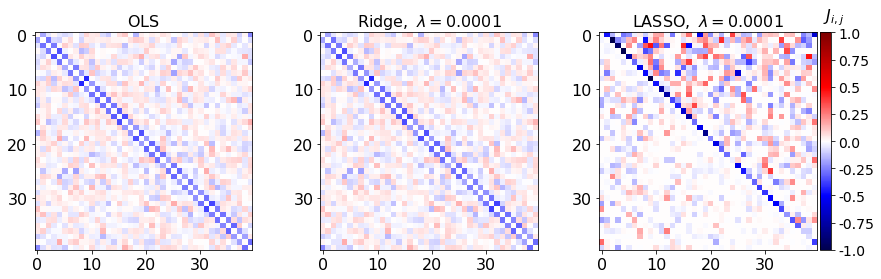

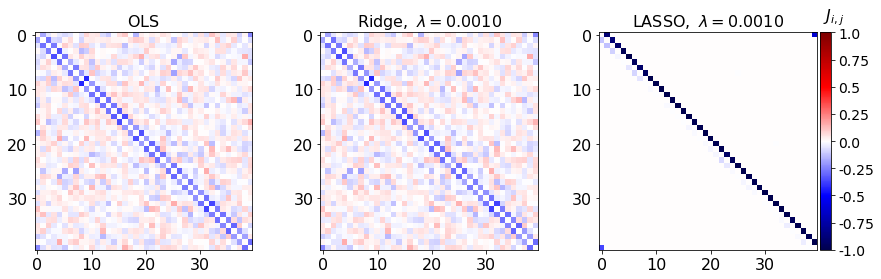

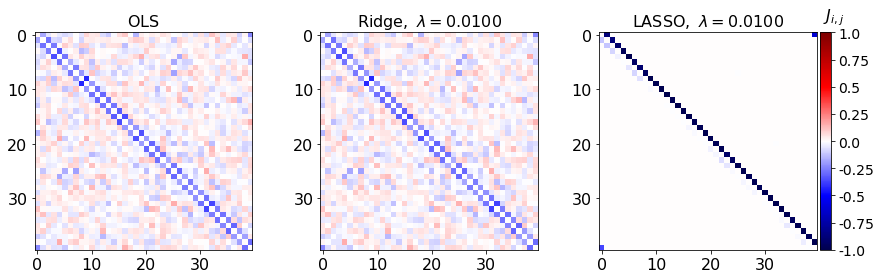

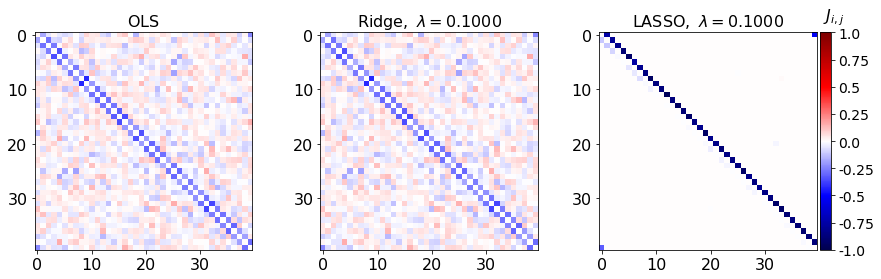

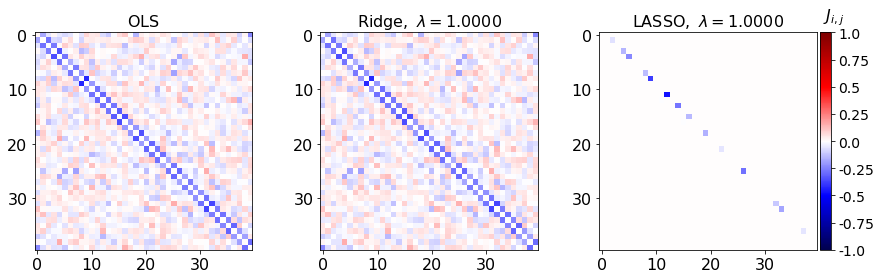

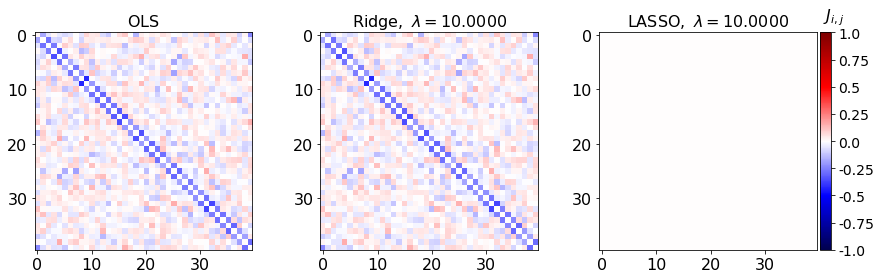

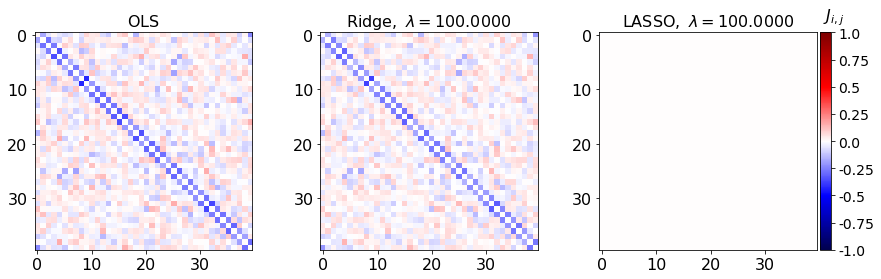

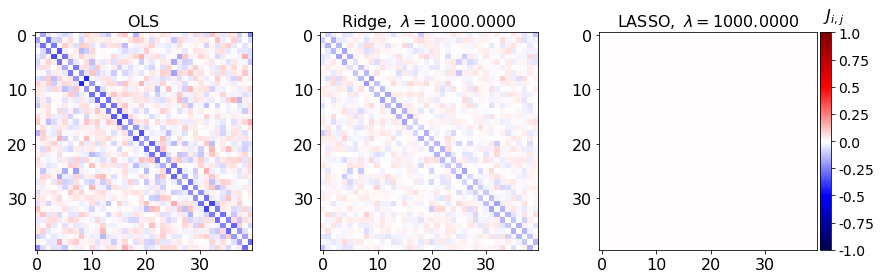

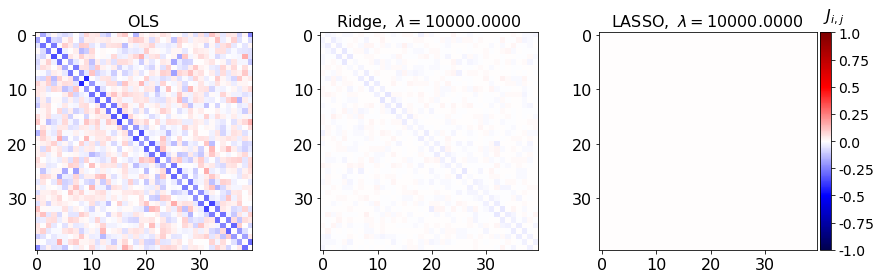

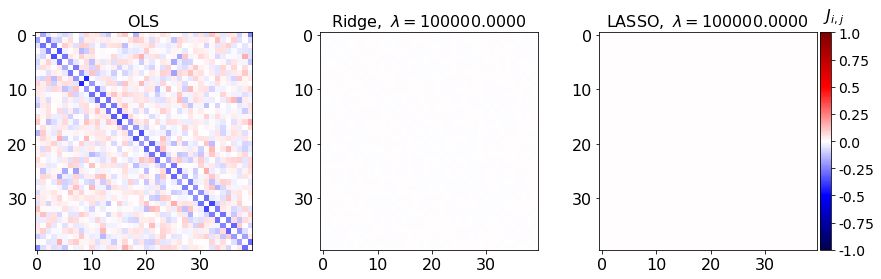

In [7]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
%matplotlib inline

# set up Lasso and Ridge Regression models
leastsq=linear_model.LinearRegression()
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()

# define error lists
train_errors_leastsq = []
test_errors_leastsq = []

train_errors_ridge = []
test_errors_ridge = []

train_errors_lasso = []
test_errors_lasso = []

# set refularisations trength values
lmbdas = np.logspace(-4, 5, 10)

#Initialize coeffficients for ridge regression and Lasso
coefs_leastsq = []
coefs_ridge = []
coefs_lasso=[]

for lmbda in lmbdas:
    
    ### ordinary least squares
    leastsq.fit(X_train, Y_train) # fit model 
    coefs_leastsq.append(leastsq.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_leastsq.append(leastsq.score(X_train, Y_train))
    test_errors_leastsq.append(leastsq.score(X_test,Y_test))
    
    ### apply Ridge regression
    ridge.set_params(alpha=lmbda) # set regularisation parameter
    ridge.fit(X_train, Y_train) # fit model 
    coefs_ridge.append(ridge.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, Y_train))
    test_errors_ridge.append(ridge.score(X_test,Y_test))
    
    ### apply Ridge regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    coefs_lasso.append(lasso.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_lasso.append(lasso.score(X_train, Y_train))
    test_errors_lasso.append(lasso.score(X_test,Y_test))

    ### plot Ising interaction J
    J_leastsq=np.array(leastsq.coef_).reshape((L,L))
    J_ridge=np.array(ridge.coef_).reshape((L,L))
    J_lasso=np.array(lasso.coef_).reshape((L,L))

    cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

    fig, axarr = plt.subplots(nrows=1, ncols=3)
    
    axarr[0].imshow(J_leastsq,**cmap_args)
    axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
    axarr[0].tick_params(labelsize=16)
    
    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('$\\mathrm{Ridge},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[1].tick_params(labelsize=16)
    
    im=axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[2].tick_params(labelsize=16)
    
    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(im, cax=cax)
    
    cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
    
    fig.subplots_adjust(right=2.0)
    
    plt.show()

To quantify learning, we also plot the in-sample and out-of-sample errors

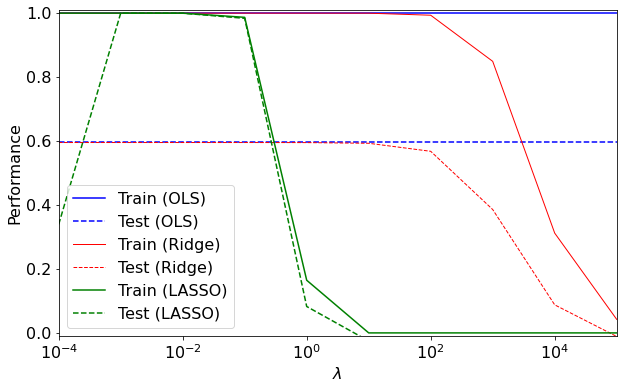

In [8]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

## Understanding the results

Let us make a few remarks: (i) the (inverse, see [Scikit documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)) regularization parameter $\lambda$ affects the Ridge and LASSO regressions at scales, separated by a few orders of magnitude. Notice that this is different for the data considered in Notebook 3 __Section VI: Linear Regression (Diabetes)__. Therefore, it is considered good practice to always check the performance for the given model and data with $\lambda$. (ii) at $\lambda\to 0$ and $\lambda\to\infty$, all three models overfit the data, as can be seen from the deviation of the test errors from unity (dashed lines), while the training curves stay at unity. (iii) While the OLS and Ridge regression test curves are monotonic, the LASSO test curve is not -- suggesting the optimal LASSO regularization parameter is $\lambda\approx 10^{-2}$. At this sweet spot, the Ising interaction weights ${\bf J}$ contain only nearest-neighbor terms (as did the model the data was generated from).

Gauge degrees of freedom: recall that the uniform nearest-neighbor interactions strength $J_{j,k}=J$ which we used to generate the data was set to unity, $J=1$. Moreover, $J_{j,k}$ was NOT defined to be symmetric (we only used the $J_{j,j+1}$ but never the $J_{j,j-1}$ elements). The colorbar on the matrix elements plot above suggest that the OLS and Ridge regression learn uniform symmetric weights $J=-0.5$. There is no mystery since this amounts to taking into account both the $J_{j,j+1}$ and the $J_{j,j-1}$ terms, and the weights are distributed symmetrically between them. LASSO, on the other hand, can break this symmetry (see matrix elements plots for $\lambda=0.001$ and $\lambda=0.01$). Thus, we see how different regularization schemes can lead to learning equivalent models but in different gauges. Any information we have about the symmetry of the unknown model that generated the data has to be reflected in the definition of the model and the regularization chosen.

### Numerical Exercise 3: (10 points) ###  
<ul>
<li> Plot a histogram of the distribution of the components of ${\bf J}$ at different values of the number of training sample (one can go up to $2\times 10^4$). What happens with the sampling noise as the number of samples is increased/decreased for the three types of regression considered? How does do the matrix elements plots above change?

<li> Try to learn the underlying model of the data, assuming it lies within the class of one-body Hamiltonians, i.e. make the ansatz 
$$H_\mathrm{model}[\boldsymbol{S}^i] = \sum_{j=1}^L h_jS_{j}$$
for some unknown field $h_j$. How well can you explain the data? How well does the model generalize? Study these problems by playing with the size of the data set. Try out all three regression models and determine which one does the best. 
    
(**Extra Credit 5 points**) What is the relationship to Mean-Field Theory of this model? (If you need a refresher on Mean Field Theory for Ising model, see this [video lecture](https://www.youtube.com/watch?v=rbbyl0SD3TQ&t=2683s) 
</ul>

### Extra Credit (Challenging): Theoretical Problem on Bias and Variance in Regularized Linear Models (10 points) 

Similar setting to Theoretical Problem 1, we'll now calculate the bias and variance for regularized linear model.

(a) Show that $$\textbf{w}_{reg} = \textbf{w}_{true} - \lambda\left(X^{\mathrm{T}} \mathrm{X}+\lambda \mathrm{I}\right)^{-1} \mathbf{w}_{true} +\left(\mathrm{X}^{\mathrm{T}} \mathrm{X}+\lambda \mathrm{I}\right)^{-1}{\mathrm{X}}^{\mathrm{T}} \epsilon_S$$

(b) Show that to first order in $1/n$,  $$ \begin{aligned}
\text { bias } & \approx \frac{\lambda^{2}}{(\lambda+N)^{2}}\left\|\mathbf{w}_{\mathrm{true}}\right\|^{2}, \\
\text { var } & \approx \frac{\sigma^{2}}{N} \mathbb{E}\left[\operatorname{trace}\left(\mathrm{H}^{2}(\lambda)\right)\right],
\end{aligned} $$

where $H$ is defined to be similar to that in theoretical problem 1. Note that the bias and the variance are defined by, respectively, 

$$ \text{bias} = \mathbb{E}\left[\left( \bar{\textbf{w}}_{ridge} \cdot \textbf{x} - (\textbf{w}_{true}\cdot \textbf{x} + \epsilon_\textbf{x}) \right)^2\right]$$, 

$$ \text{var} = \mathbb{E}\left[ \left( \textbf{w}_{ridge}^{(D)} \cdot \textbf{x} - \bar{\textbf{w}}_{ridge} \cdot \textbf{x} \right)^2\right] $$,

where the expectation is first take with respect to $\epsilon_\textbf{x}$, then with respect to the test point $\textbf{x}$, and the last remaining expectation will be with respect to $X$. 
(Hint: You will need the cyclic property of the trace.)

